<a href="https://colab.research.google.com/github/DirasanthuSwetha/slashmark-internship/blob/main/Fake_News_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

In [4]:
from google.colab import files

# Upload files
uploaded = files.upload()

Saving news.csv to news (1).csv


In [5]:
df = pd.read_csv('/content/news.csv')
print(df.shape)
df.head()

(6335, 4)


,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [7]:
#Get the labels from the DataFrame
news_classes = df.label
news_classes.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [8]:
#split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(df['text'], news_classes, test_size=0.2, random_state=42)

In [9]:
#initializing the Vectorizer
vectorizer = TfidfVectorizer(stop_words = 'english', max_df=0.7)

#fit and transform the train and transform the test
tfidf_train = vectorizer.fit_transform(X_train)
tfidf_test = vectorizer.transform(X_test)

In [10]:
#initializing PassiveAggressiveClassifier & setting n_epochs
pac = PassiveAggressiveClassifier(max_iter = 50)
pac.fit(tfidf_train, y_train)

PassiveAggressiveClassifier(max_iter=50)

In [11]:
#predicting on the test and calculate the accuracy.

y_pred = pac.predict(tfidf_test)
score = accuracy_score(y_test, y_pred)

print(f'Accuracy : {round(score*100, 2)}%')


Accuracy : 93.53%


In [12]:
#Build Confusion Matrix
confusion_matrix(y_test, y_pred)


array([[588,  40],
       [ 42, 597]])

In [13]:
#Building the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=['FAKE', 'REAL'])



In [14]:
conf_matrix_table = classification_report(y_test, y_pred, labels=['FAKE', 'REAL'])

print(conf_matrix_table)

              precision    recall  f1-score   support

        FAKE       0.93      0.94      0.93       628
        REAL       0.94      0.93      0.94       639

    accuracy                           0.94      1267
   macro avg       0.94      0.94      0.94      1267
weighted avg       0.94      0.94      0.94      1267



<Axes: >

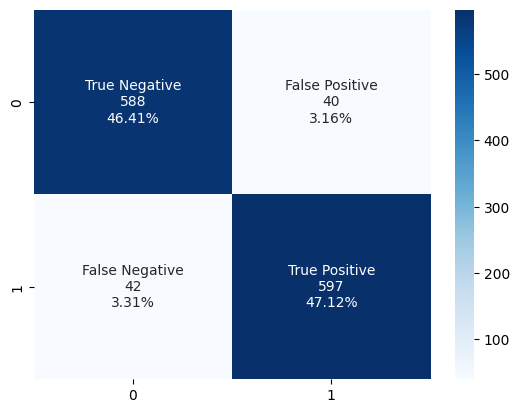

In [15]:
#visualization of confusion matrix

group_names = ['True Negative','False Positive','False Negative','True Positive']

group_counts = ['{0:0.0f}'.format(value) for value in
                conf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     conf_matrix.flatten()/np.sum(conf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_matrix, annot=labels, fmt='', cmap='Blues')